# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import json
import urllib
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [7]:
#OpenWeatherMap API Key
api_key = weather_api_key

#starting URL for Weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#Define empty lists to store values

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Print to logger
print("Beginning Data Retrieval")
print("------------------------")

#Create counters
record_count = 1
set_count = 1

#Looping through cities to make api calls using city as query
#Loop through all cities in out list
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    
#Extracting data. Missing data is handled by try and except  
    try:
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"]) 
        print(f"Processing record {i}|{city}")
        i+=1
         
    except (KeyError):
        print("City not found. skipping.")
    
print('''
-----------------------------
Data Retrieval Complete
-----------------------------''')         
     

Beginning Data Retrieval
------------------------
Processing record 1|rikitea
Processing record 2|carnarvon
City not found. skipping.
Processing record 3|georgetown
Processing record 4|syamzha
Processing record 5|punta arenas
Processing record 6|aklavik
Processing record 7|emba
Processing record 8|mataura
City not found. skipping.
Processing record 9|ponta do sol
Processing record 10|thompson
Processing record 11|fairbanks
Processing record 12|bluff
City not found. skipping.
Processing record 13|ahipara
Processing record 14|busselton
Processing record 15|atuona
Processing record 16|saldanha
Processing record 17|ibra
Processing record 18|mahebourg
Processing record 19|butaritari
Processing record 20|hobart
Processing record 21|tasiilaq
Processing record 22|tecalitlan
Processing record 23|schladming
Processing record 24|nuuk
Processing record 25|auki
Processing record 26|lagoa
Processing record 27|portland
Processing record 28|guaranda
Processing record 29|comodoro rivadavia
Processing r

Processing record 239|faanui
Processing record 240|leshukonskoye
Processing record 241|beringovskiy
Processing record 242|pandharpur
Processing record 243|victoria
Processing record 244|hefei
Processing record 245|alice springs
Processing record 246|kudahuvadhoo
Processing record 247|bilibino
Processing record 248|westport
Processing record 249|korla
Processing record 250|dhidhdhoo
Processing record 251|watertown
Processing record 252|luanda
Processing record 253|villa bruzual
Processing record 254|port lincoln
Processing record 255|bilma
Processing record 256|peniche
Processing record 257|lulea
Processing record 258|saint george
Processing record 259|vanavara
Processing record 260|vad
Processing record 261|kununurra
Processing record 262|limon
Processing record 263|esperance
Processing record 264|banda aceh
City not found. skipping.
Processing record 265|havelock
Processing record 266|srednekolymsk
Processing record 267|vostok
Processing record 268|ixtapa
Processing record 269|poponde

Processing record 489|kedrovyy
Processing record 490|baykit
Processing record 491|venado tuerto
Processing record 492|sur
Processing record 493|san carlos de bariloche
Processing record 494|pacific grove
Processing record 495|narsaq
Processing record 496|yelatma
Processing record 497|bonavista
Processing record 498|nageshwari
Processing record 499|cabedelo
Processing record 500|dong hoi
Processing record 501|juneau
Processing record 502|miyako
Processing record 503|maniitsoq
Processing record 504|puerto leguizamo
Processing record 505|sakaiminato
Processing record 506|lang suan
Processing record 507|prado
Processing record 508|port macquarie
Processing record 509|san cristobal
Processing record 510|huai thalaeng
Processing record 511|tecpan
Processing record 512|tuapse
Processing record 513|canchungo
Processing record 514|beloha
Processing record 515|kupang
Processing record 516|sembe
Processing record 517|mount gambier
Processing record 518|pimentel
Processing record 519|matay
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Turn appended lists into dictionary
weather_dict = {
                "City": cities,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": max_temp,
                "Cloudiness": cloudiness,
                "Humidity": humidity, 
                "Wind Speed": wind_speed,
                "Country": country,
                "Date": date                       
               }
#Turn dictionary into dataframe
city_data = pd.DataFrame({k: pd.Series(l) for k, l in weather_dict.items()})


# export city_data into csv
export_csv = city_data.to_csv (output_data_file, index_label = "City_ID")

# display Dataframe head
city_data.head()

City      Lat       Lng  Max Temp  Cloudiness  Humidity  Wind Speed  \
0     rikitea -23.1203 -134.9692     76.59       100.0      86.0       16.22   
1   carnarvon -24.8667  113.6333     78.60       100.0      48.0       11.12   
2     marcona   5.4112  100.3354     89.89        40.0      70.0        3.51   
3  georgetown  60.0158   41.0614     65.35        65.0      68.0        9.75   
4     syamzha -53.1500  -70.9167     37.51         0.0      87.0        9.40   

  Country          Date  
0      PF  1.623046e+09  
1      AU  1.623046e+09  
2      MY  1.623046e+09  
3      RU  1.623046e+09  
4      CL  1.623046e+09

In [12]:
city_data.count()

City          614
Lat           560
Lng           560
Max Temp      560
Cloudiness    560
Humidity      560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [13]:
# drop all the rows in which any of the column contains null value.
city_data = city_data.dropna(how="any")
city_data.count()

City          560
Lat           560
Lng           560
Max Temp      560
Cloudiness    560
Humidity      560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [14]:
#Exporting data to csv
city_data.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#  Get the indices of cities that have humidity over 100%.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

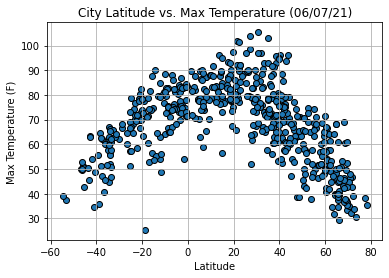

In [17]:
#set todat date
today_date = pd.to_datetime('today').date().strftime('%m/%d/%y')

#Set x and y values
x_values = city_data['Lat']
y_values = city_data['Max Temp']

# Create scatter plot for lats vs temp
plt.scatter(x_values, y_values, edgecolors='black')

#Set Labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({today_date})")

#save & show
plt.savefig('output_data/CityLatitudeVsMaxTemp.png')

After each plot, add a sentence or two explaining what the code is analyzing.

The above scatterplot is analyzing temperature values as we move closer and further away from the equator. We can see that temps rise as we near 0˚ latitude (equatorial location)
Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops.
The Temperature (F) vs. Latitude plot shown above, which includes data from all cities, peaks at approximately 20-degrees latitude. The latitude values below that latitude show a possible linear relationship with temperature, and the latitude values above that latitude also show a possible linear relationship with temperature, with both trends ending at the same peak temperature and latitude.


## Latitude vs. Humidity Plot

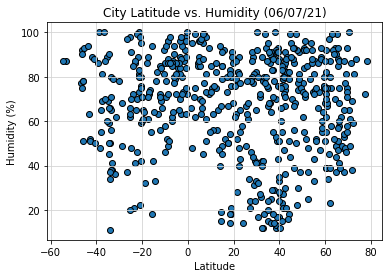

In [18]:
#Set x and y values
x_values = city_data['Lat']
y_values = city_data['Humidity']

# Create scatter plot for lats vs temp
plt.scatter(x_values, y_values, edgecolors='black')

#Set Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({today_date})")

#style grid
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save & show
plt.savefig('output_data/CityLatitudeVsHumidity.png')

The Humidity vs. Latitude plot shown above, which contains data from all cities, shows a relatively spread-out distribution of data points. There does not appear to be a relationship between humidity and latitude at first glance, but the humidity percentages seem to largely cluster above 50%. Polar regions have lower humidity and as latitude gets higher,humidity gets higher in southern hemisphere.he above scatterplot is analyzing humidity values as we move closer and further away from the equator. It looks like humidity levels are not clearly different near 0˚ latitude (equatorial location).

## Latitude vs. Cloudiness Plot

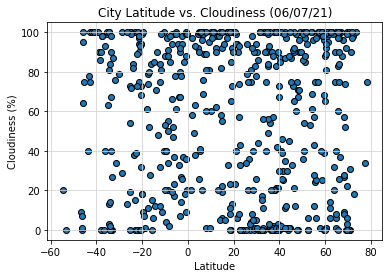

In [19]:
#Set x and y values
x_values = city_data['Lat']
y_values = city_data['Cloudiness']

# Create scatter plot for lats vs temp
plt.scatter(x_values, y_values, edgecolors='black')

#Set Labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({today_date})")

#style grid
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save & show
plt.savefig('output_data/CityLatitudeVsCloudiness.png')

 Cloudiness data is widely spread across the latitude. The scatterplot above does not appear to show a definitive relationship between cloud cover and geolocation.The Cloudiness vs. Latitude plot shown above, containing data from all cities, does not seem to show a relationship between cloudiness and city latitude. There seem to be some values for cloudiness that the points cluster along, noticeably 0, 20, 40, 75, 90, and 100, so those values may be rounded or categorized from some of the sources, and not represent continuous variables or measurements.



## Latitude vs. Wind Speed Plot

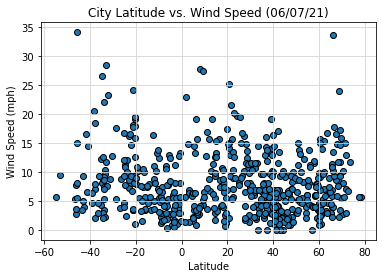

In [20]:
#Set x and y values
x_values = city_data['Lat']
y_values = city_data['Wind Speed']

# Create scatter plot for lats vs temp
plt.scatter(x_values, y_values, edgecolors='black')

#Set Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({today_date})")

#style grid
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save & show
plt.savefig('output_data/CityLatitudeVsWindSpeed.png')

Wind speed data is widely spread across the latitude.The Wind speed vs. Latitude plot, shown above for all cities, does not seem to show any relationship between wind speed and latitude. Most of the wind speed values are below about 25 mph, with only a few values above that wind speed limit.Another scatterplot of wind speeds and geolocation comparisons. Again, the data seems like there is no clear pattern for wind speed measured at distances from the equator.




## Linear Regression

In [21]:
 def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = city_data.loc[city_data['Lat'] >= 0, :]
southern_hemisphere_df = city_data.loc[city_data['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.742042546948891


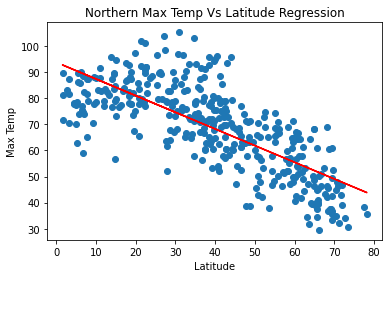

In [23]:
linear_reg_plot(northern_hemisphere_df, 'Northern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/NorthernMaxTempVsLatitudeReg.png', (10,0)) 

There is a strong negative correlation between latitude and max temperature for northern hemisphere.



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7053864816264391


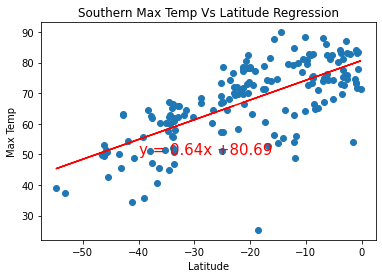

In [24]:
linear_reg_plot(southern_hemisphere_df, 'Southern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/SouthernMaxTempVsLatitudeReg.png', (-40,50)) 

There is a moderate positive correlation between latitude and max temperature for southern hemisphere.



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.01781126828372174


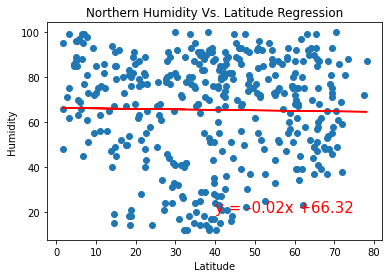

In [25]:
linear_reg_plot(northern_hemisphere_df, 'Northern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/NorthernHumidityVsLatitudeReg.png', (40,20)) 

There is a moderate positive correlation between latitude and humidity for northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.203114930915187


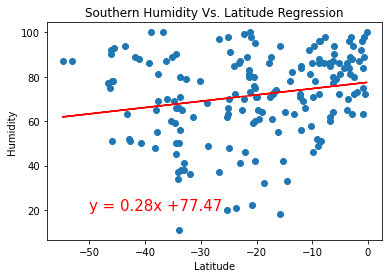

In [26]:
linear_reg_plot(southern_hemisphere_df, 'Southern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/SouthernHumidityVsLatitudeReg.png', (-50,20)) 

#There is a moderate positive correlation between latitude and humidity for southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.013677349397189004


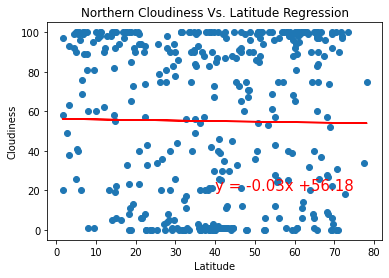

In [27]:
linear_reg_plot(northern_hemisphere_df, 'Northern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/NorthernCloudinessVsLatitudeReg.png', (40,20)) 

There is a weak positive correlation between latitude and cloudiness for northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.022337444081687807


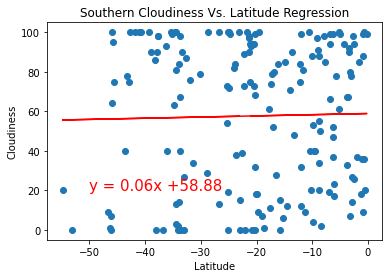

In [28]:
linear_reg_plot(southern_hemisphere_df, 'Southern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/SouthernCloudinessVsLatitudeReg.png', (-50,20)) 

There is a weak positive correlation between latitude and cloudiness for southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.049414028657209993


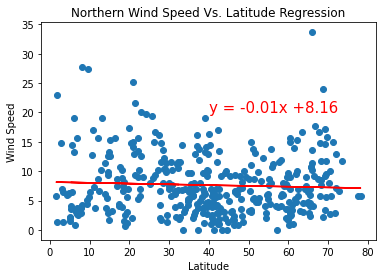

In [29]:
linear_reg_plot(northern_hemisphere_df, 'Northern Wind Speed Vs. Latitude Regression', 'Wind Speed', 'Wind Speed', 'output_data/NorthernWindSpeedVsLatitudeReg.png', (40,20)) 

There is a weak positive correlation between latitude and windspeed for northern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.27408940588019837


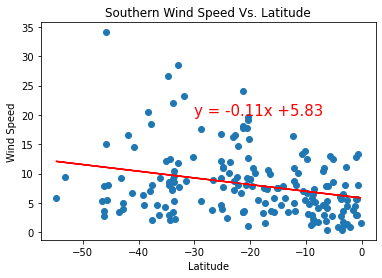

In [30]:
linear_reg_plot(southern_hemisphere_df, 'Southern Wind Speed Vs. Latitude', 'Wind Speed', 'Wind Speed', 'output_data/SouthernWindSpeedVsLatitudeReg.png', (-30,20)) 

There is a weak negative correlation between latitude and wind speed for southern hemisphere.